In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

np.random.seed(1024)

import seaborn as sns


In [4]:
#datafile = "/home/hideaki/SynologyNFS/myProgram/pythonProj/KaggleData/TwoSigma/train.h5"
datafile = "/Users/donchan/Documents/myData/KaggleData/TwoSigma/train.h5"

hfdata = pd.HDFStore(datafile,"r")

In [3]:
train = hfdata.get("train")

In [4]:
len(train["y"])

1710756

In [5]:
uniq_timestamp = train["timestamp"].unique()
uniq_id = train["id"].unique()

In [6]:
print len(uniq_timestamp),len(uniq_id)

1813 1424


In [7]:
i = len(uniq_timestamp) / 2

In [8]:
i

906

In [9]:
timesplit = uniq_timestamp[i]

In [10]:
df_train = train[train.timestamp < timesplit]

In [11]:
df_test = train[train.timestamp >= timesplit]

In [12]:
len(df_train), len(df_test),timesplit

(806298, 904458, 906)

In [13]:
subset = df_test[df_test.timestamp == timesplit]

In [14]:
subset[subset.id == 0]

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
806298,0,906,0.246848,0.102251,0.002781,-0.029337,0.400748,-0.273942,0.535335,0.243197,...,-0.193842,-4.642828e-10,-4.642828e-10,-4.436047e-10,-0.057845,-0.054224,0.000044,-1.999907,-0.052079,0.00171


In [15]:
df_test_id_uniq = df_test['id'].unique()
df_train_id_uniq = df_train['id'].unique()

In [16]:
print(df_train_id_uniq.shape, df_test_id_uniq.shape)

((1096,), (1298,))


In [17]:
test_id = df_test_id_uniq[0]

In [18]:
print(test_id)

0


In [19]:
dftmp = df_train[df_train.id == test_id]

In [24]:
h, w = dftmp.shape

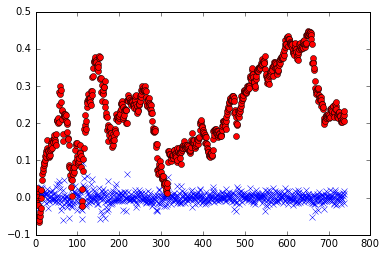

In [30]:
plt.plot(range(h),dftmp["y"].values,"x")
plt.plot(range(h),np.cumsum( dftmp["y"].values) ,"o",c="r")

In [7]:
df_train_0time = df_train[ df_train.timestamp == 0]
df_train_1time = df_train[ df_train.timestamp == 1]

NameError: name 'df_train' is not defined

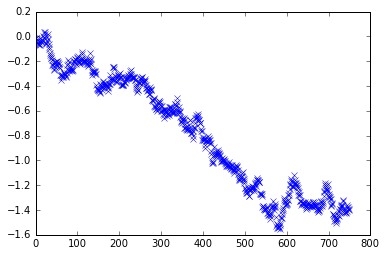

In [41]:
plt.plot(range(len(df_train_0time)), np.cumsum( df_train_0time['y'] ),'x')

In [6]:
plt.plot(range(len(df_train_1time)), np.cumsum( df_train_1time['y'] ),'o', c='r')
df_train_1time.shape

NameError: name 'df_train_1time' is not defined

In [78]:
df_train_1time.loc[:,'y_cumnsum'] = np.cumsum( df_train_1time['y'] )
df_train_1time.loc[:,'serialno'] = np.arange( df_train_1time.shape[0]  )

In [ ]:
sns.factorplot(x="serialno", y="y_cumnsum", hue="id", data=df_train_1time);


In [57]:
top15_timestamp = uniq_timestamp[:15]
print (top15_timestamp)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


14

-- length of timeframe:750
  last cumsum of y:-0.01175
-- length of timeframe:750


KeyError: 0

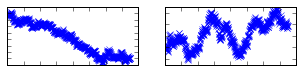

In [62]:
fig = plt.figure( figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(5,3,i+1)
    ax.tick_params(labelbottom="off")
    ax.tick_params(labelleft="off")
    
    df_train_0time = df_train[ df_train.timestamp == i]
    
    y_cumsum = np.cumsum( df_train_0time['y'] )
    plt.plot(range(len(df_train_0time)), y_cumsum,'x')
    print("-- length of timeframe:%d" % len(y_cumsum) )
    print("  last cumsum of y:%.5f" % y_cumsum[0] )
    
    
    
    

In [1]:
range(2,110)

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109]